In [38]:
import pandas as pd
import numpy as np
# read datasdet using pandas
df = pd.read_csv('employees.csv')
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [39]:
df.shape

(1000, 8)

In [40]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [41]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [42]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [43]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [44]:
df["Gender"].fillna("No Gender", inplace = True)
df.isnull().sum()

/tmp/ipykernel_2868239/758587071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("No Gender", inplace = True)


First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [45]:
mode = df['Senior Management'].mode().values[0]
df['Senior Management']=df['Senior Management'].replace(np.nan, mode)
df.isnull().sum()

/tmp/ipykernel_2868239/1249380818.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Senior Management']=df['Senior Management'].replace(np.nan, mode)


First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [46]:
df = df.dropna(axis=0, how='any')
print(df.isnull().sum())
df.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

In [47]:
# Convert 'Start Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Convert 'Last Login Time' to time format
df['Last Login Time']= pd.to_datetime(df['Last Login Time']).dt.time
df.dtypes, df.head()

/tmp/ipykernel_2868239/118261009.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Login Time']= pd.to_datetime(df['Last Login Time']).dt.time


(First Name                   object
 Gender                       object
 Start Date           datetime64[ns]
 Last Login Time              object
 Salary                        int64
 Bonus %                     float64
 Senior Management              bool
 Team                         object
 dtype: object,
   First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
 0    Douglas    Male 1993-08-06        12:42:00   97308    6.945   
 2      Maria  Female 1993-04-23        11:17:00  130590   11.858   
 3      Jerry    Male 2005-03-04        13:00:00  138705    9.340   
 4      Larry    Male 1998-01-24        16:47:00  101004    1.389   
 5     Dennis    Male 1987-04-18        01:35:00  115163   10.125   
 
    Senior Management             Team  
 0               True        Marketing  
 2              False          Finance  
 3               True          Finance  
 4               True  Client Services  
 5              False            Legal  )

In [48]:
# Calculate gender distribution across the company
gender_distribution = df['Gender'].value_counts(normalize=True) * 100
gender_distribution

Gender
Female       43.715239
Male         41.268076
No Gender    15.016685
Name: proportion, dtype: float64

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#fit and transform the "Senior Management" column with LabelEncoder
df['Gender'] = le.fit_transform(df['Gender'])

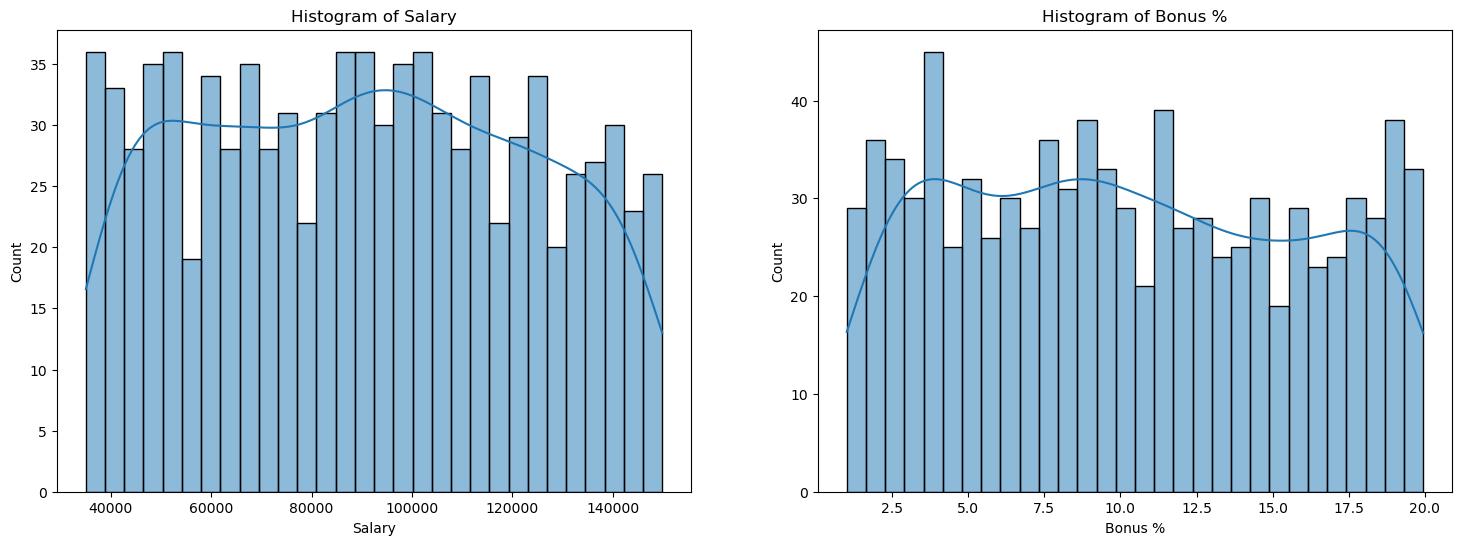

In [50]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis: Histograms for 'Salary' and 'Bonus %'
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(df['Salary'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Salary')

sns.histplot(df['Bonus %'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Bonus %')
plt.show()
                         

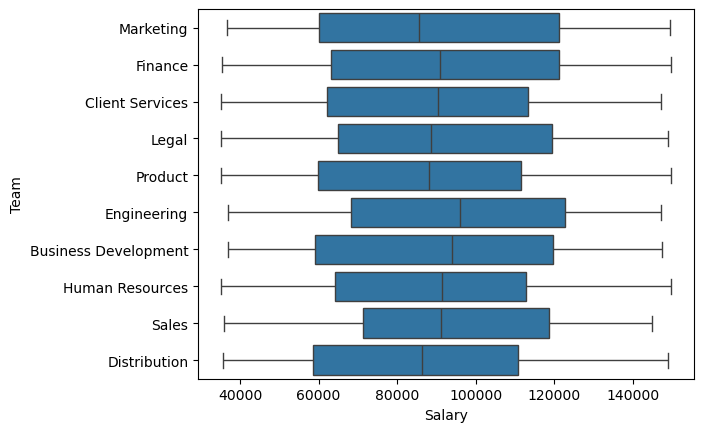

In [51]:
sns.boxplot( x='Salary', y='Team', data=df, )
plt.show()

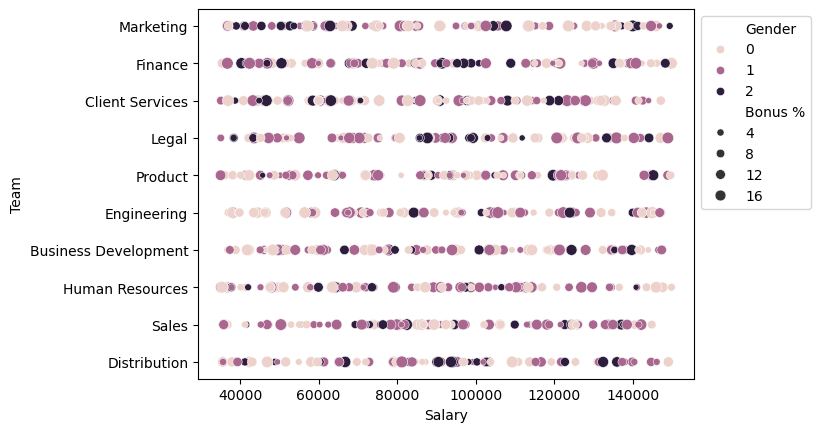

In [52]:
sns.scatterplot ( x="Salary", y='Team', data=df, 
                 hue='Gender', size='Bonus %')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()

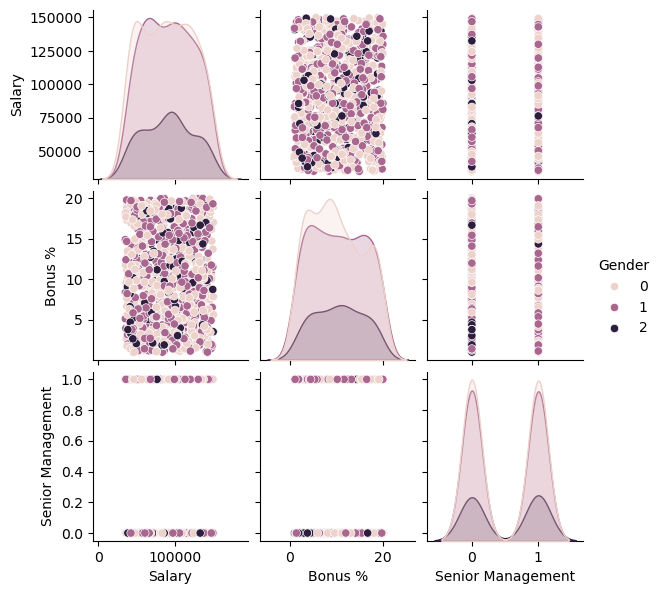

In [53]:
sns.pairplot(df, hue='Gender', height=2)

In [54]:
# Calculate IQR for Salary and Bonus %
Q1_salary = df['Salary'].quantile(0.25)
Q3_salary = df['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

Q1_bonus = df['Bonus %'].quantile(0.25)
Q3_bonus = df['Bonus %'].quantile(0.75)
IQR_bonus = Q3_bonus - Q1_bonus

In [55]:
# Define outliers
outliers_salary = df[(df['Salary'] < (Q1_salary - 1.5 * IQR_salary)) | 
(df['Salary'] > (Q3_salary + 1.5 * IQR_salary))]

outliers_bonus = df[(df['Bonus %'] < (Q1_salary - 1.5 * IQR_bonus)) |
(df['Bonus %'] > (Q3_bonus + 1.5 * IQR_bonus))]

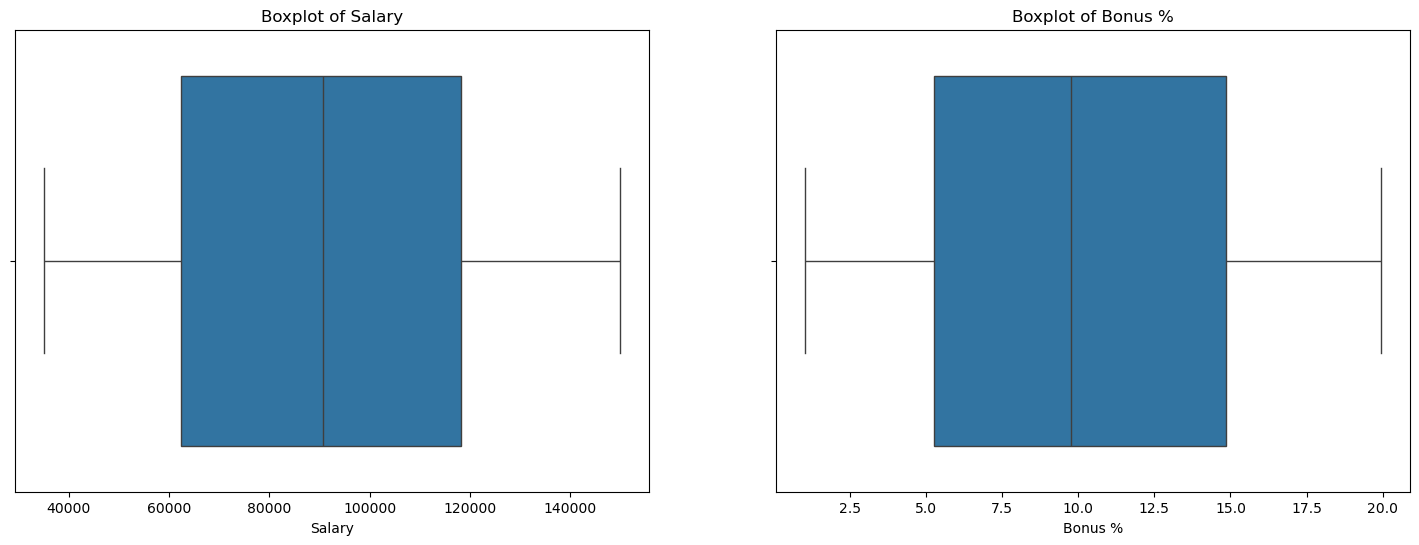

(0, 899)

In [57]:
#Plotting boxplots
fig, axes = plt.subplots (1, 2, figsize=(18, 6))
sns.boxplot(x=df['Salary'], ax=axes[0])
axes[0].set_title('Boxplot of Salary')
sns.boxplot(x=df['Bonus %'], ax=axes[1])
axes[1].set_title('Boxplot of Bonus %')

#Show the plots
plt.show()

# Display the number of outliers detected
outliers_salary.shape[0], outliers_bonus.shape[0]


In [ ]:
#Step 1: Understand the background of the data
#Step 2: Import and describe data
#Step 3: Look for missing values and remove or fill them depending the type. 
#Step 4: Look the data type and distribution
#Step 5: Data transformation for analysis. In this case encoding of gender
#Step 6: Visualization of the data with different graphas like scatter plots and histograms. 
#Step 7: Look for outliers and show them in a boxplot. 